<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12,8

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [3]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Нормальное распределение**

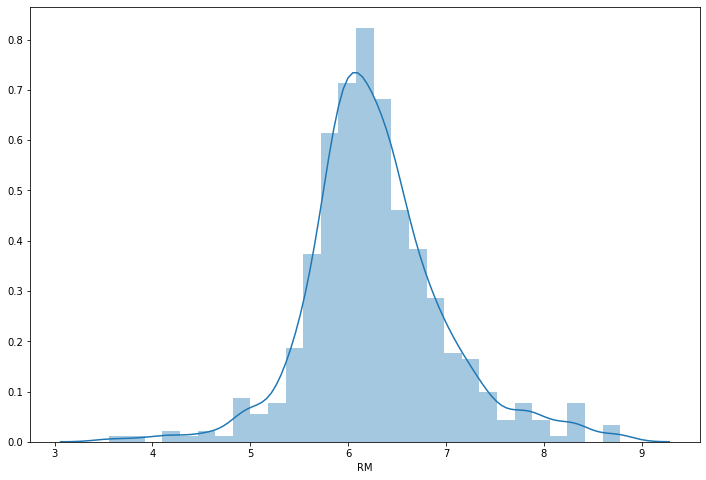

In [4]:
sns.distplot(data['RM']) 
plt.show()

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное 
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



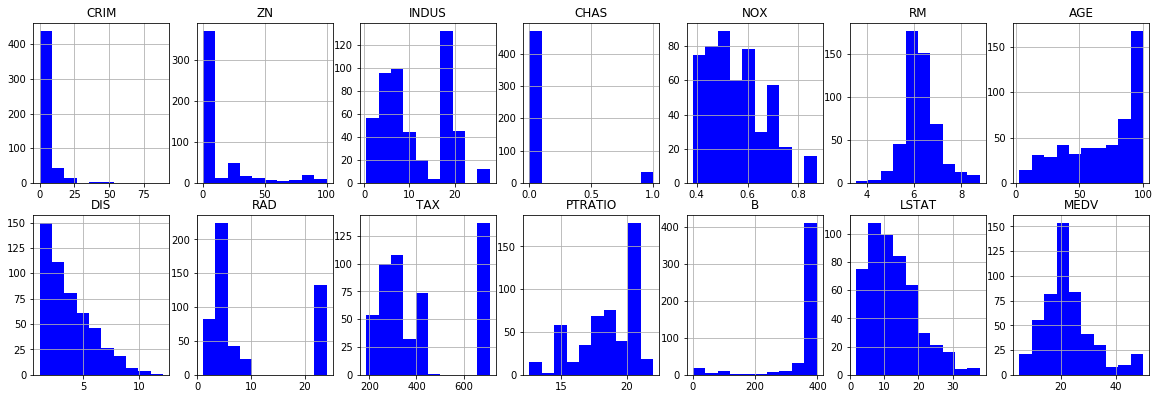

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(3, 7, 1)
plt.hist(data['CRIM'], 10, color='b')
plt.title('CRIM')
plt.grid(True)          
plt.subplot(3, 7, 2)
plt.hist(data['ZN'], 10, color='b') 
plt.title('ZN')
plt.grid(True)   
plt.subplot(3, 7, 3)
plt.hist(data['INDUS'], 10, color='b') 
plt.title('INDUS')
plt.grid(True)  
plt.subplot(3, 7, 4)
plt.hist(data['CHAS'], 10, color='b') 
plt.title('CHAS')
plt.grid(True)  
plt.subplot(3, 7, 5)
plt.hist(data['NOX'], 10, color='b') 
plt.title('NOX')
plt.grid(True)
plt.subplot(3, 7, 6)
plt.hist(data['RM'], 10, color='b') 
plt.title('RM')
plt.grid(True)
plt.subplot(3, 7, 7)
plt.hist(data['AGE'], 10, color='b') 
plt.title('AGE')
plt.grid(True)
plt.subplot(3, 7, 8)
plt.hist(data['DIS'], 10, color='b') 
plt.title('DIS')
plt.grid(True)
plt.subplot(3, 7, 9)
plt.hist(data['RAD'], 10, color='b') 
plt.title('RAD')
plt.grid(True)
plt.subplot(3, 7, 10)
plt.hist(data['TAX'], 10, color='b') 
plt.title('TAX')
plt.grid(True)
plt.subplot(3, 7, 11)
plt.hist(data['PTRATIO'], 10, color='b') 
plt.title('PTRATIO')
plt.grid(True)
plt.subplot(3, 7, 12)
plt.hist(data['B'], 10, color='b') 
plt.title('B')
plt.grid(True)
plt.subplot(3, 7, 13)
plt.hist(data['LSTAT'], 10, color='b') 
plt.title('LSTAT')
plt.grid(True)
plt.subplot(3, 7, 14)
plt.hist(data['MEDV'], 10, color='b') 
plt.title('MEDV')
plt.grid(True)

1. Нормальное - **RM**
2. Биноминальное - **MEDV**
3. Бернулли - **CHAS**
4. Геометрическое - **DIS**
5. Логнормальное - **LSTAT**

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

In [6]:
matrix_corr = np.round(data.corr(), decimals=2)
matrix_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


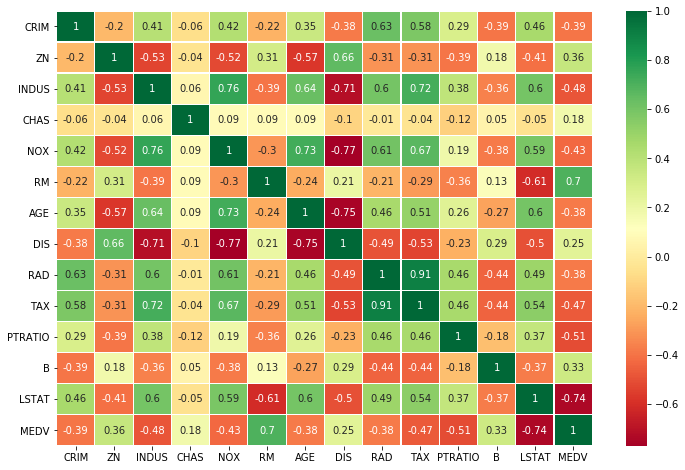

In [7]:
heatmap = sns.heatmap(matrix_corr, annot=True, cmap='RdYlGn', linewidths=0.2)

**Максимально коррелирующие атрибуты RM, PTRATOI, LSTAT**

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [8]:
house_price = np.array(data['MEDV']).reshape(-1,1)
lstat = np.array(data['LSTAT']).reshape(-1,1)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    house_price,
    lstat,
    test_size = 0.2
)

In [11]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
predicted_y = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

28.34038276150092
4.069172103042884


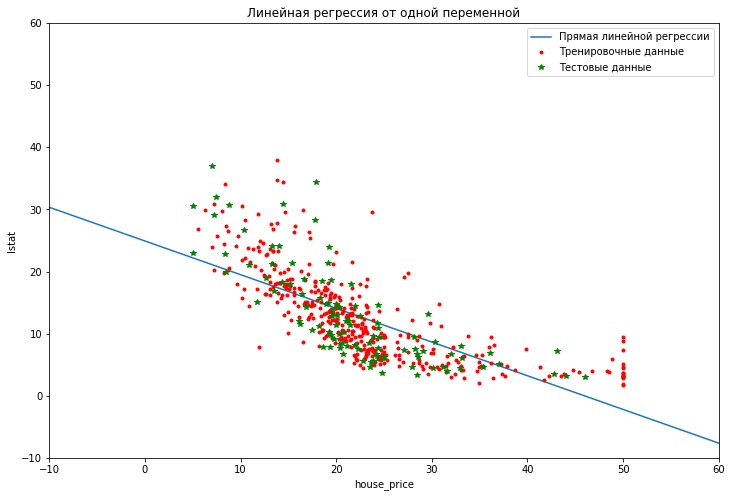

In [14]:
plt.xlabel('house_price')
plt.ylabel('lstat')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g*')
plt.xlim(-10,60)
plt.ylim(-10,60)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

В таблице представлены следующие переменные:
*  Country - название страны
*  Ladder - показатель насколько удовлетворены жизнью
*  SD of Ladder - среднеквадратическое отклонение показателя удовлетворенностью жизнью
*  Positive affect - показатель позитивных эмоций
*  Negative affect - показатель негативных эмоций
*  Social support - насколько социальная поддержка повлияла на уровень счастья
*  Freedom - насколько показатель степени свободы повлиял на уровень счастья
*  Corruption - насколько показатель коррупции влияет на уровень счастья
*  Generosity - насколько уровень щедрости влияет на уровень счастья
*  Log of GDP per capita - насколько Валовый Внутренний продукт влияет на уровень счастья
*  Healthy life expectancy - насколько продолжительность жизни влияет на уровень счастья

In [15]:
url = "http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data_2 = pd.read_csv(url)
data_2.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [16]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Матрица ковариаций попарно.

In [17]:
data_2.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [95]:
nan = data_2.isna().sum().reset_index()
print('Ответ:', nan[0].sum(), 'отсутствующих значения.')

Ответ: 23 отсутствующих значения.


Сколько стран в выборке? Написать ответ. 

In [96]:
country= data_2.groupby('Country (region)')[['Ladder']].count().reset_index()
print('Ответ:', len(country['Country (region)']), 'стран')

Ответ: 156 стран


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [97]:
matrix_corr_2 = np.round(data_2.corr(), decimals=2)

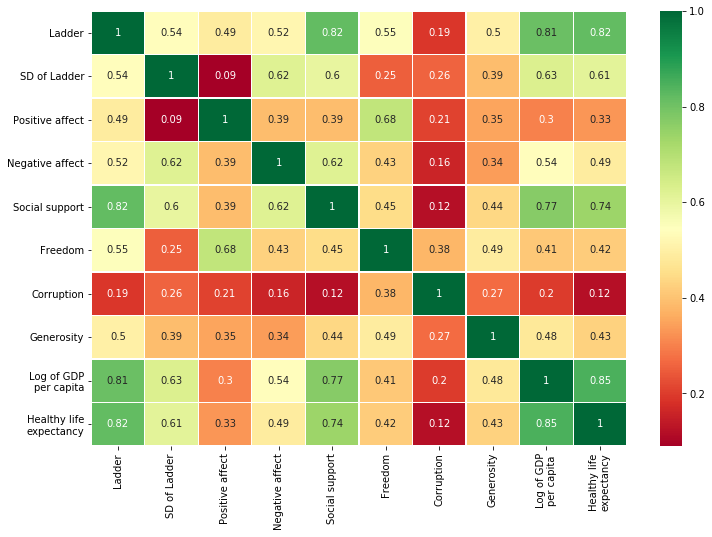

In [98]:
heatmap = sns.heatmap(matrix_corr_2, annot=True, cmap='RdYlGn', linewidths=0.2)

**Выводы:**

1. Чем выше уровень свободы тем выше позитивный эффект
2. Чем выше негативный эффект тем выше соц поддержка 
3. Чем выше соц поддержка тем выше удовлетворенность жизнью
4. Чем выше соц поддержка  тем выше продолжительность жизни
5. Чем выше уровень жизни тем выше продолжительность жизни

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [4]:
trials = 10
values = np.random.randint(1, 7, size=trials)

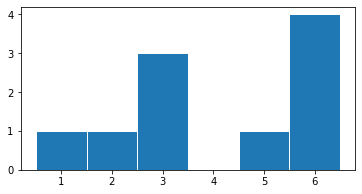

In [5]:
plt.figure(figsize=(6, 3))
plt.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')
plt.show()

**Равномерное распределение**

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [17]:
trials_2 = 100
number_of_sums = 1000
values_2 = np.random.randint(1, 7, size=trials_2)

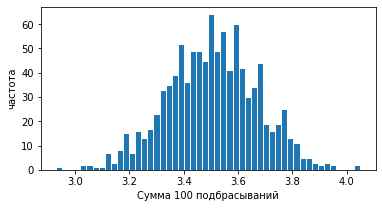

In [18]:
x = np.zeros([number_of_sums])
for i in range(number_of_sums):
    x[i] = np.sum(np.random.randint(1, 7, size=trials_2)) / trials_2
plt.figure(figsize=(6, 3))
plt.hist(x, 50, edgecolor='white')
plt.xlabel('Сумма 100 подбрасываний')
plt.ylabel('частота')
plt.show()

**График изменился так как выборка значительно больше чем в первом случае, а согластно центральной предельной теоремы, сумма большого количества независимых случайных величин имеет распределение близкое к нормальному.** 